<a href="https://colab.research.google.com/github/ArshiaYousefnia/AI-S2024-Project/blob/main/AI_NLP_Project_Spring2024_Student_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import libraries

In [1]:
!pip install -q transformers[torch]
!pip install -q python-bidi
!pip install -q hazm

In [2]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import re
from hazm import Normalizer, word_tokenize, stopwords_list
import os
from wordcloud import WordCloud, STOPWORDS
from bidi import algorithm as bidi
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import string
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import torch
from tqdm import tqdm
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True


# Exploratory Data Analysis (EDA) on Movie Dataset

The Exploratory Data Analysis (EDA) process is a crucial step to understand the characteristics and patterns present in a dataset. In this notebook, we'll perform EDA on a movie dataset to gain insights into various aspects such as genre distribution, release years, runtime, and ratings for both Persian and English language movies.

During the EDA process, we'll explore the dataset by:

1. Analyzing the genre distribution for Persian and English movies to identify popular genres.
2. Examining the release year trends for Persian and English movies to understand the distribution over time.
3. Investigating the runtime statistics for Persian and English movies to study the typical movie lengths.
4. Evaluating the rating distributions for Persian and English movies to gauge audience preferences.
...

The EDA process is iterative, and additional analyses may be required based on the insights gained from the initial exploration. The goal is to develop a comprehensive understanding of the dataset for both Persian and English language movies before proceeding with further analysis or modeling.

Feel free to explore the dataset creatively and provide any additional insights or visualizations that you find interesting or valuable. We encourage you to bring your unique perspective and creativity to enhance the EDA process.

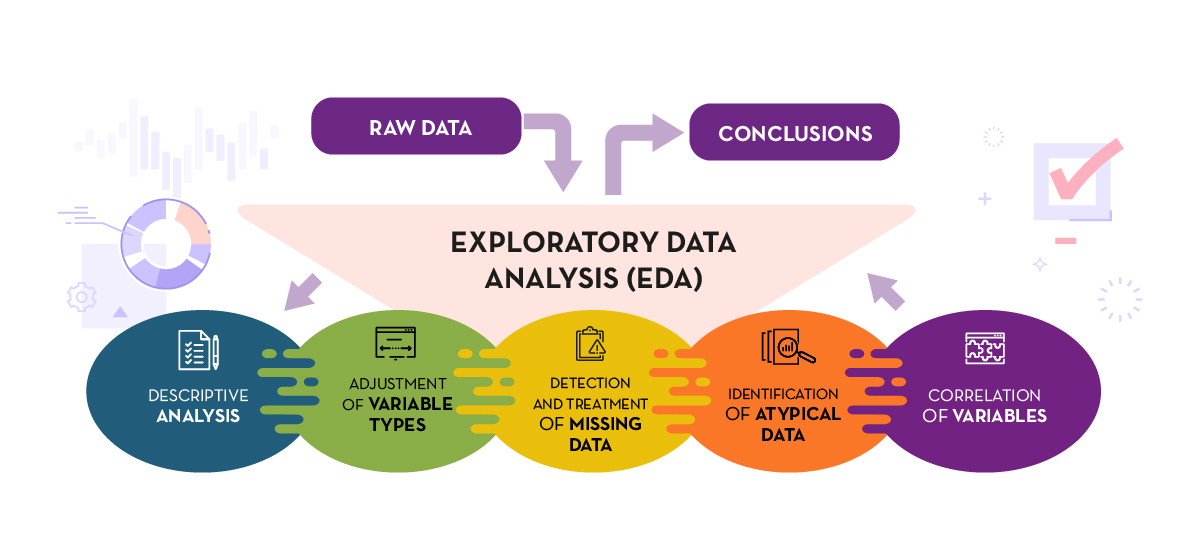

###1. **Data Preprocessing**:
   - Load the dataset
   - Check for missing values and handle them appropriately
   - Convert data types if necessary (e.g., string to datetime for release dates)
   - Create a new column called "preprocessed summary" where you perform the following steps and save the preprocessed summary in that column and later use it for the finetuning and analysis:
  *   Tokenize words
  *   Normalize text
  *   Remove punctuations
  *   Remove stopwords
  *   Removing HTML tags or markup
  *   Lemmatizing or stemming words
  *   Removing numbers or special characters
  *   Removing or replacing non-ASCII characters



In [4]:
df = pd.read_csv("persianmovies.csv")

In [5]:
class English_Preprocessor:
    """
    A class for preprocessing text data.

    Attributes:
        stopwords (set): A set of stopwords to be removed from the text.
        nlp (spacy.lang.en.English): A SpaCy English language model for text normalization.

    Methods:
        preprocess(text): Performs preprocessing steps on the given text.
        normalize(text): Normalizes the given text by converting it to lowercase and lemmatizing the words.
        remove_punctuations(text): Removes punctuation from the given text.
        word_tokenize(text): Tokenizes the given text into individual words.
        remove_stopwords(words): Removes stopwords from the given list of words.
        **ADD MORE METHODS**
    """

    def __init__(self):
        """
        Initializes the Preprocessor object.

        TODO: Load the set of stopwords for the English language.
        TODO: Load the SpaCy English language model for text normalization.
        """
        self.stopwords = set(stopwords.words('english'))
        self.nlp = spacy.load('en_core_web_sm')

    def preprocess(self, text):
        """
        Preprocesses the given text by performing normalization, punctuation removal, word tokenization, and stopword removal.

        Args:
            text (str): The input text to be preprocessed.

        Returns:
            str: The preprocessed text.

        TODO: Implement the preprocess method by calling the respective helper methods in the correct order.
        """
        text = self.normalize(text)
        text = self.remove_punctuations(text)
        words = self.word_tokenize(text)
        words = self.remove_stopwords(words)
        return ' '.join(words)

    def normalize(self, text):
        """
        Normalizes the given text by converting it to lowercase and lemmatizing the words.

        Args:
            text (str): The input text to be normalized.

        Returns:
            str: The normalized text.

        TODO: Implement the normalize method using the SpaCy language model to lemmatize the words.
        """
        doc = self.nlp(text.lower())
        return ' '.join([token.lemma_ for token in doc if not token.is_punct])


    def remove_punctuations(self, text):
        """
        Removes punctuation from the given text.

        Args:
            text (str): The input text from which punctuation needs to be removed.

        Returns:
            str: The text with punctuation removed.

        TODO: Implement the remove_punctuations method using regular expressions.
        """
        return re.sub(r'[^\w\s]', '', text)

    def word_tokenize(self, text):
        """
        Tokenizes the given text into individual words.

        Args:
            text (str): The input text to be tokenized.

        Returns:
            list: A list of tokens (words) in the text.

        TODO: Implement the word_tokenize method using the NLTK word_tokenize function.
        """
        return word_tokenize(text)

    def remove_stopwords(self, words):
        """
        Removes stopwords from the given list of words.

        Args:
            words (list): A list of words from which stopwords need to be removed.

        Returns:
            list: A list of words with stopwords removed.

        TODO: Implement the remove_stopwords method by filtering out words present in the stopwords set.
        """
        return [word for word in words if word.lower() not in self.stopwords]

In [6]:
# TODO: Apply the preprocess method of the Preprocessor object to the English Summary column of the DataFrame
# and store the preprocessed text in a new column named 'Preprocessed English'.
# TODO: Display the updated DataFrame with the new 'Preprocessed English' column.
df = df.dropna()
preprocessor = English_Preprocessor()
df['Preprocessed English'] = df['Content_2'].apply(preprocessor.preprocess)
df.head()

,Link,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time,Preprocessed English
0,https://www.imvbox.com/watch-persian-movie-ira...,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018,Drama,73,jalal dropout philosophy student realize siste...
1,https://www.imvbox.com/watch-persian-movie-ira...,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018,Crime,78,murder rich twin brother barbod assume identit...
2,https://www.imvbox.com/watch-persian-movie-ira...,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017,Drama,77,man woman car accident go coma spouse know two...
3,https://www.imvbox.com/watch-persian-movie-ira...,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018,Drama,79,gilda restaurant terrible night till morning s...
4,https://www.imvbox.com/watch-persian-movie-ira...,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017,Drama,85,vahid marjan young couple get divorce month ag...


In [7]:
from hazm import Normalizer, word_tokenize, stopwords_list

# TODO: Initialize the HAZM Normalizer
# TODO: Load the Persian stopwords list
# TODO: Load desired functions from HAZM (or any other library)
normalizer = Normalizer()
stop_words = stopwords_list()
def persian_preprocess_text(text):
    """
    Preprocesses the given Persian text by performing normalization, punctuation removal, word tokenization, and stopword removal.

    Args:
        text (str): The input Persian text to be preprocessed.

    Returns:
        str: The preprocessed Persian text.

    TODO: Implement the following steps:
    1. Remove punctuations from the text using regular expressions.
    2. Normalize the text using the HAZM Normalizer.
    3. Tokenize the normalized text using the HAZM word_tokenize function.
    4. Remove stopwords from the tokenized text using the loaded stopwords list.
    5. Join the remaining tokens back into a string.
    6. ... (what other preprocessing methods you want to have)
    """
    text = re.sub(r'[^\w\s]', '', text)
    text = normalizer.normalize(text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    preprocessed_text = ' '.join(words)

    return preprocessed_text

# TODO: Apply the persian_preprocess_text function to the Persian Summary column of the DataFrame
# and store the preprocessed text in a new column named 'Preprocessed Persian'.
# TODO: Display the updated DataFrame with the new 'Preprocessed Persian' column.
df['Preprocessed Persian'] = df['Content_1'].apply(persian_preprocess_text)
df.head()


,Link,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time,Preprocessed English,Preprocessed Persian
0,https://www.imvbox.com/watch-persian-movie-ira...,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018,Drama,73,jalal dropout philosophy student realize siste...,جلال دانشجوی سابق رشته فلسفه متوجه خواهرش اختل...
1,https://www.imvbox.com/watch-persian-movie-ira...,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018,Crime,78,murder rich twin brother barbod assume identit...,آشفتهگی رئالیستی اجتماعی فیلم عشق جنایت
2,https://www.imvbox.com/watch-persian-movie-ira...,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017,Drama,77,man woman car accident go coma spouse know two...,تصادف اتومبیل آدمهایی تقابل قرار مراقبت مصدومی...
3,https://www.imvbox.com/watch-persian-movie-ira...,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018,Drama,79,gilda restaurant terrible night till morning s...,گیلدا ماجرای زنی نام گیلدا روایت صاحب رستوانیس...
4,https://www.imvbox.com/watch-persian-movie-ira...,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017,Drama,85,vahid marjan young couple get divorce month ag...,فیلم روایت‌گر داستان زندگی زوج جوانی اسم مرجان...


### 2. **Descriptive Statistics**:
   - Calculate summary statistics (mean, median, mode, standard deviation, range) for numerical variables
   - Determine the count and frequency of unique values for categorical variables

In [23]:

# Feel free to add any desired methods to the class below this is a suggestion.

class DescriptiveStats:
    def __init__(self, df):
        self.df = df

    def calculate_summary_stats(self, numerical_cols):
        """
        Calculate summary statistics (mean, median, mode, standard deviation, range) for numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (prints the summary statistics for each numerical column)

        TODO:
        1. Ensure that the specified columns are treated as numerical data types.
        2. Calculate and print the mean, median, mode, standard deviation, and range for each numerical column.
        """
        for col in numerical_cols:
            if col in self.df.columns:
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce')

                mean_val = self.df[col].mean()
                median_val = self.df[col].median()
                mode_val = self.df[col].mode()[0] if not self.df[col].mode().empty else np.nan
                std_dev = self.df[col].std()
                max_val = self.df[col].max()
                min_val = self.df[col].min()
                range_val = max_val - min_val

                print(f"Summary statistics for column: {col}")
                print(f"Mean: {mean_val}")
                print(f"Median: {median_val}")
                print(f"Mode: {mode_val}")
                print(f"Standard Deviation: {std_dev}")
                print(f"Range: {range_val}: {min_val} - {max_val}")
                print("\n")

    def count_unique_values(self, categorical_cols):
        """
        Determine the count and frequency of unique values for categorical variables.

        Args:
            categorical_cols (list): A list of column names containing categorical data.

        Returns:
            None (prints the count and frequency of unique values for each categorical column)

        TODO:
        1. Iterate through each categorical column.
        2. Calculate the count and frequency of unique values for each column.
        3. Print the unique values, their counts, and their frequencies.
        """
        for col in categorical_cols:
            if col in self.df.columns:
                self.df[col] = self.df[col].astype('category')

                value_counts = self.df[col].value_counts()
                total_count = len(self.df[col])
                frequencies = value_counts / total_count

                print(f"Unique values count and frequency for column: {col}")
                print(value_counts)
                print(frequencies)
                print("\n")


df["Time"] = pd.to_numeric(df["Time"], errors='coerce')
df["Genre"] = df["Genre"].astype('category')

numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='category').columns

# Assuming you have a pandas DataFrame named 'df'
stats = DescriptiveStats(df)

# TODO: Call the calculate_summary_stats method with the numerical_cols list
stats.calculate_summary_stats(numerical_cols)

# TODO: Call the count_unique_values method with the categorical_cols list
stats.count_unique_values(categorical_cols)

Summary statistics for column: Score
Mean: 6.373139158576051
Median: 6.6
Mode: 8.0
Standard Deviation: 1.5546214685316788
Range: 10.0: 0.0 - 10.0


Summary statistics for column: Year
Mean: 2006.5685005393743
Median: 2008.0
Mode: 2017
Standard Deviation: 9.95439928010764
Range: 51: 1969 - 2020


Summary statistics for column: Time
Mean: 90.96868250539957
Median: 90.0
Mode: 90.0
Standard Deviation: 12.173169068950385
Range: 140.0: 38.0 - 178.0


Unique values count and frequency for column: Genre
Genre
Drama                       537
Comedy                      177
Action                       56
Crime                        46
Adventure                    37
Family                       17
War                          16
Human Interest & Society      8
History                       7
Horror                        7
Romance                       6
Mystery                       4
Arts & Literature             3
Experimental                  2
Thriller                      2
Animation    

###3. **Data Visualization**:
   - Plot histograms or density plots for numerical variables
   - Create bar plots or pie charts for categorical variables
   - Generate scatter plots or correlation matrices to explore relationships

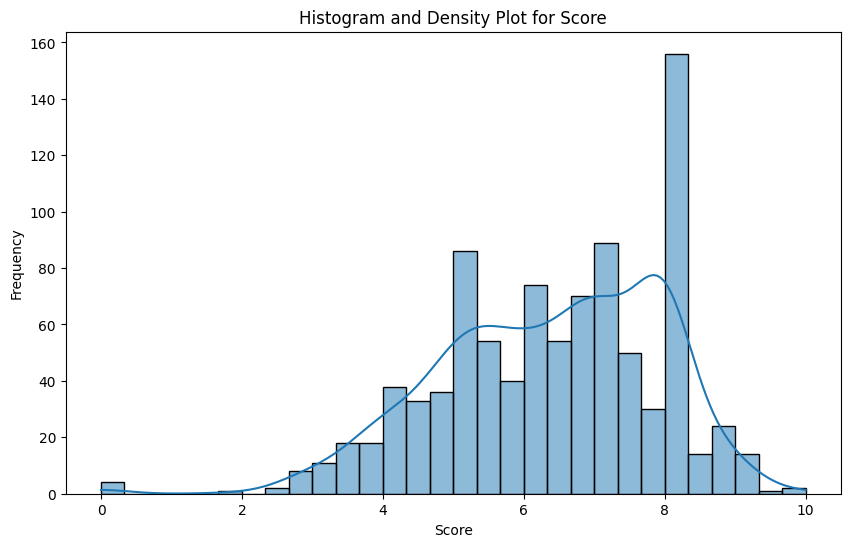

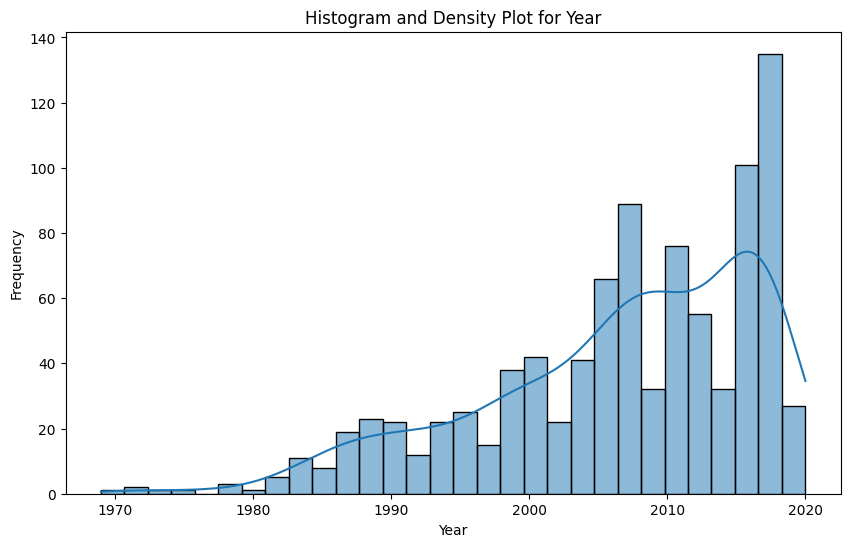

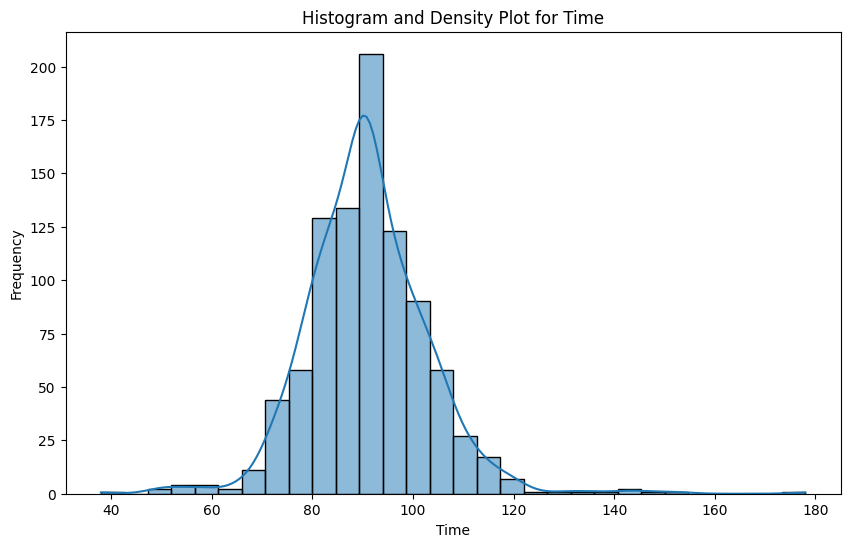

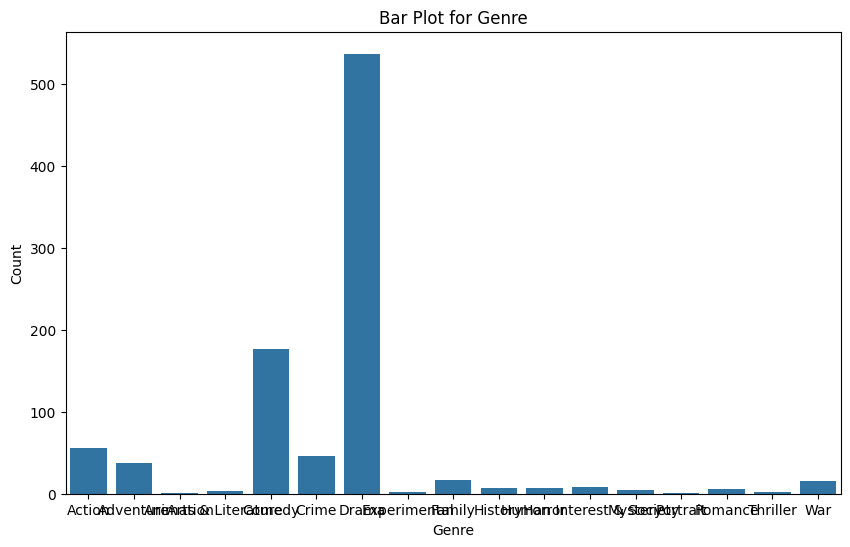

Index(['Score', 'Year', 'Time'], dtype='object')


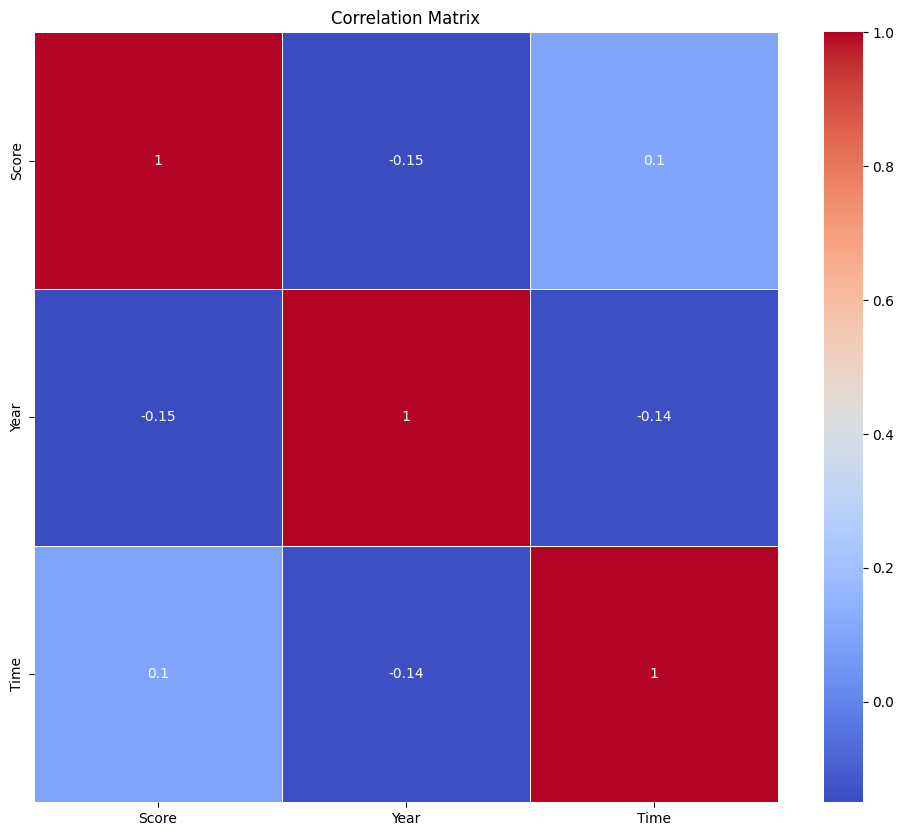

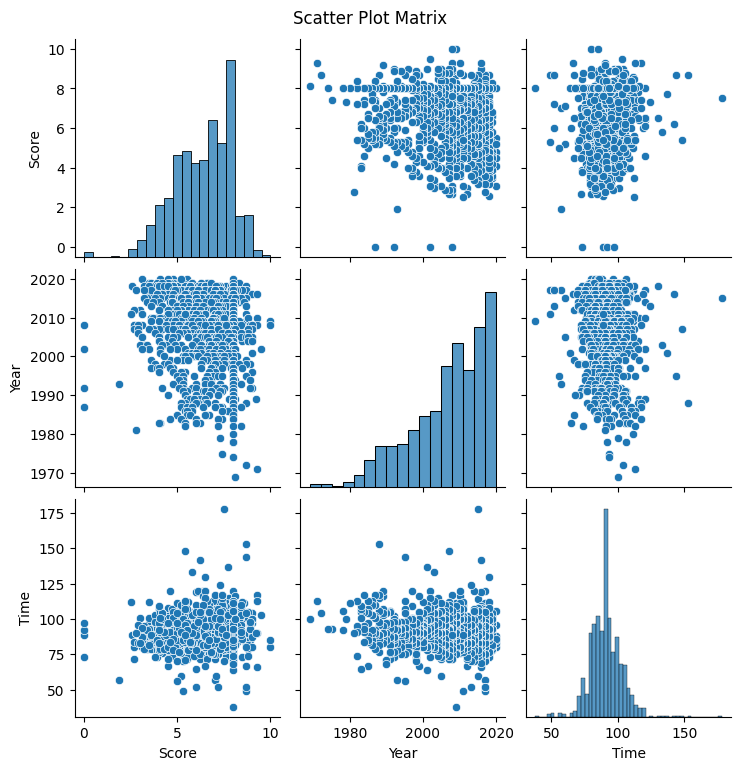

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feel free to add any desired methods to the class below this is a suggestion.
# Have fun trying to visualize your data

class DataVisualization:
    def __init__(self, df):
        self.df = df

    def plot_histograms(self, numerical_cols):
        """
        Plot histograms or density plots for numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the plots)

        TODO:
        1. Iterate through each numerical column.
        2. Create a histogram or density plot for each column using Matplotlib or Seaborn.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots.
        """
        for col in numerical_cols:
            plt.figure(figsize=(10, 6))
            sns.histplot(self.df[col], kde=True, bins=30)
            plt.title(f'Histogram and Density Plot for {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()

    def plot_categorical(self, categorical_cols):
        """
        Create bar plots or pie charts for categorical variables.

        Args:
            categorical_cols (list): A list of column names containing categorical data.

        Returns:
            None (displays the plots)

        TODO:
        1. Iterate through each categorical column.
        2. Create a bar plot or pie chart for each column using Matplotlib or Seaborn.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots.
        """
        for col in categorical_cols:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=self.df, x=col)
            plt.title(f'Bar Plot for {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.show()

    def plot_relationships(self, numerical_cols):
        """
        Generate scatter plots or correlation matrices to explore relationships between numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the plots)

        TODO:
        1. Create a scatter plot matrix or correlation matrix for the numerical columns using Matplotlib or Seaborn.
        2. Set appropriate titles and labels for the plots.
        3. Display the plots.
        """
        # Plot correlation matrix
        plt.figure(figsize=(12, 10))
        corr_matrix = self.df[numerical_cols].corr()

        if corr_matrix.isnull().values.any():
            print("Correlation matrix contains NaN values. Filling NaN values with 0.")
            corr_matrix = corr_matrix.fillna(0)

        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Matrix')
        plt.show()

        # Pairplot for scatter plots between numerical columns
        sns.pairplot(self.df[numerical_cols])
        plt.suptitle('Scatter Plot Matrix', y=1.02)
        plt.show()

# Example usage
numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='category').columns

# Assuming you have a pandas DataFrame named 'df'
viz = DataVisualization(df)

# TODO: Call the plot_histograms method with the numerical_cols list
viz.plot_histograms(numerical_cols)

# TODO: Call the plot_categorical method with the categorical_cols list
viz.plot_categorical(categorical_cols)

# TODO: Call the plot_relationships method with the numerical_cols list
viz.plot_relationships(numerical_cols)

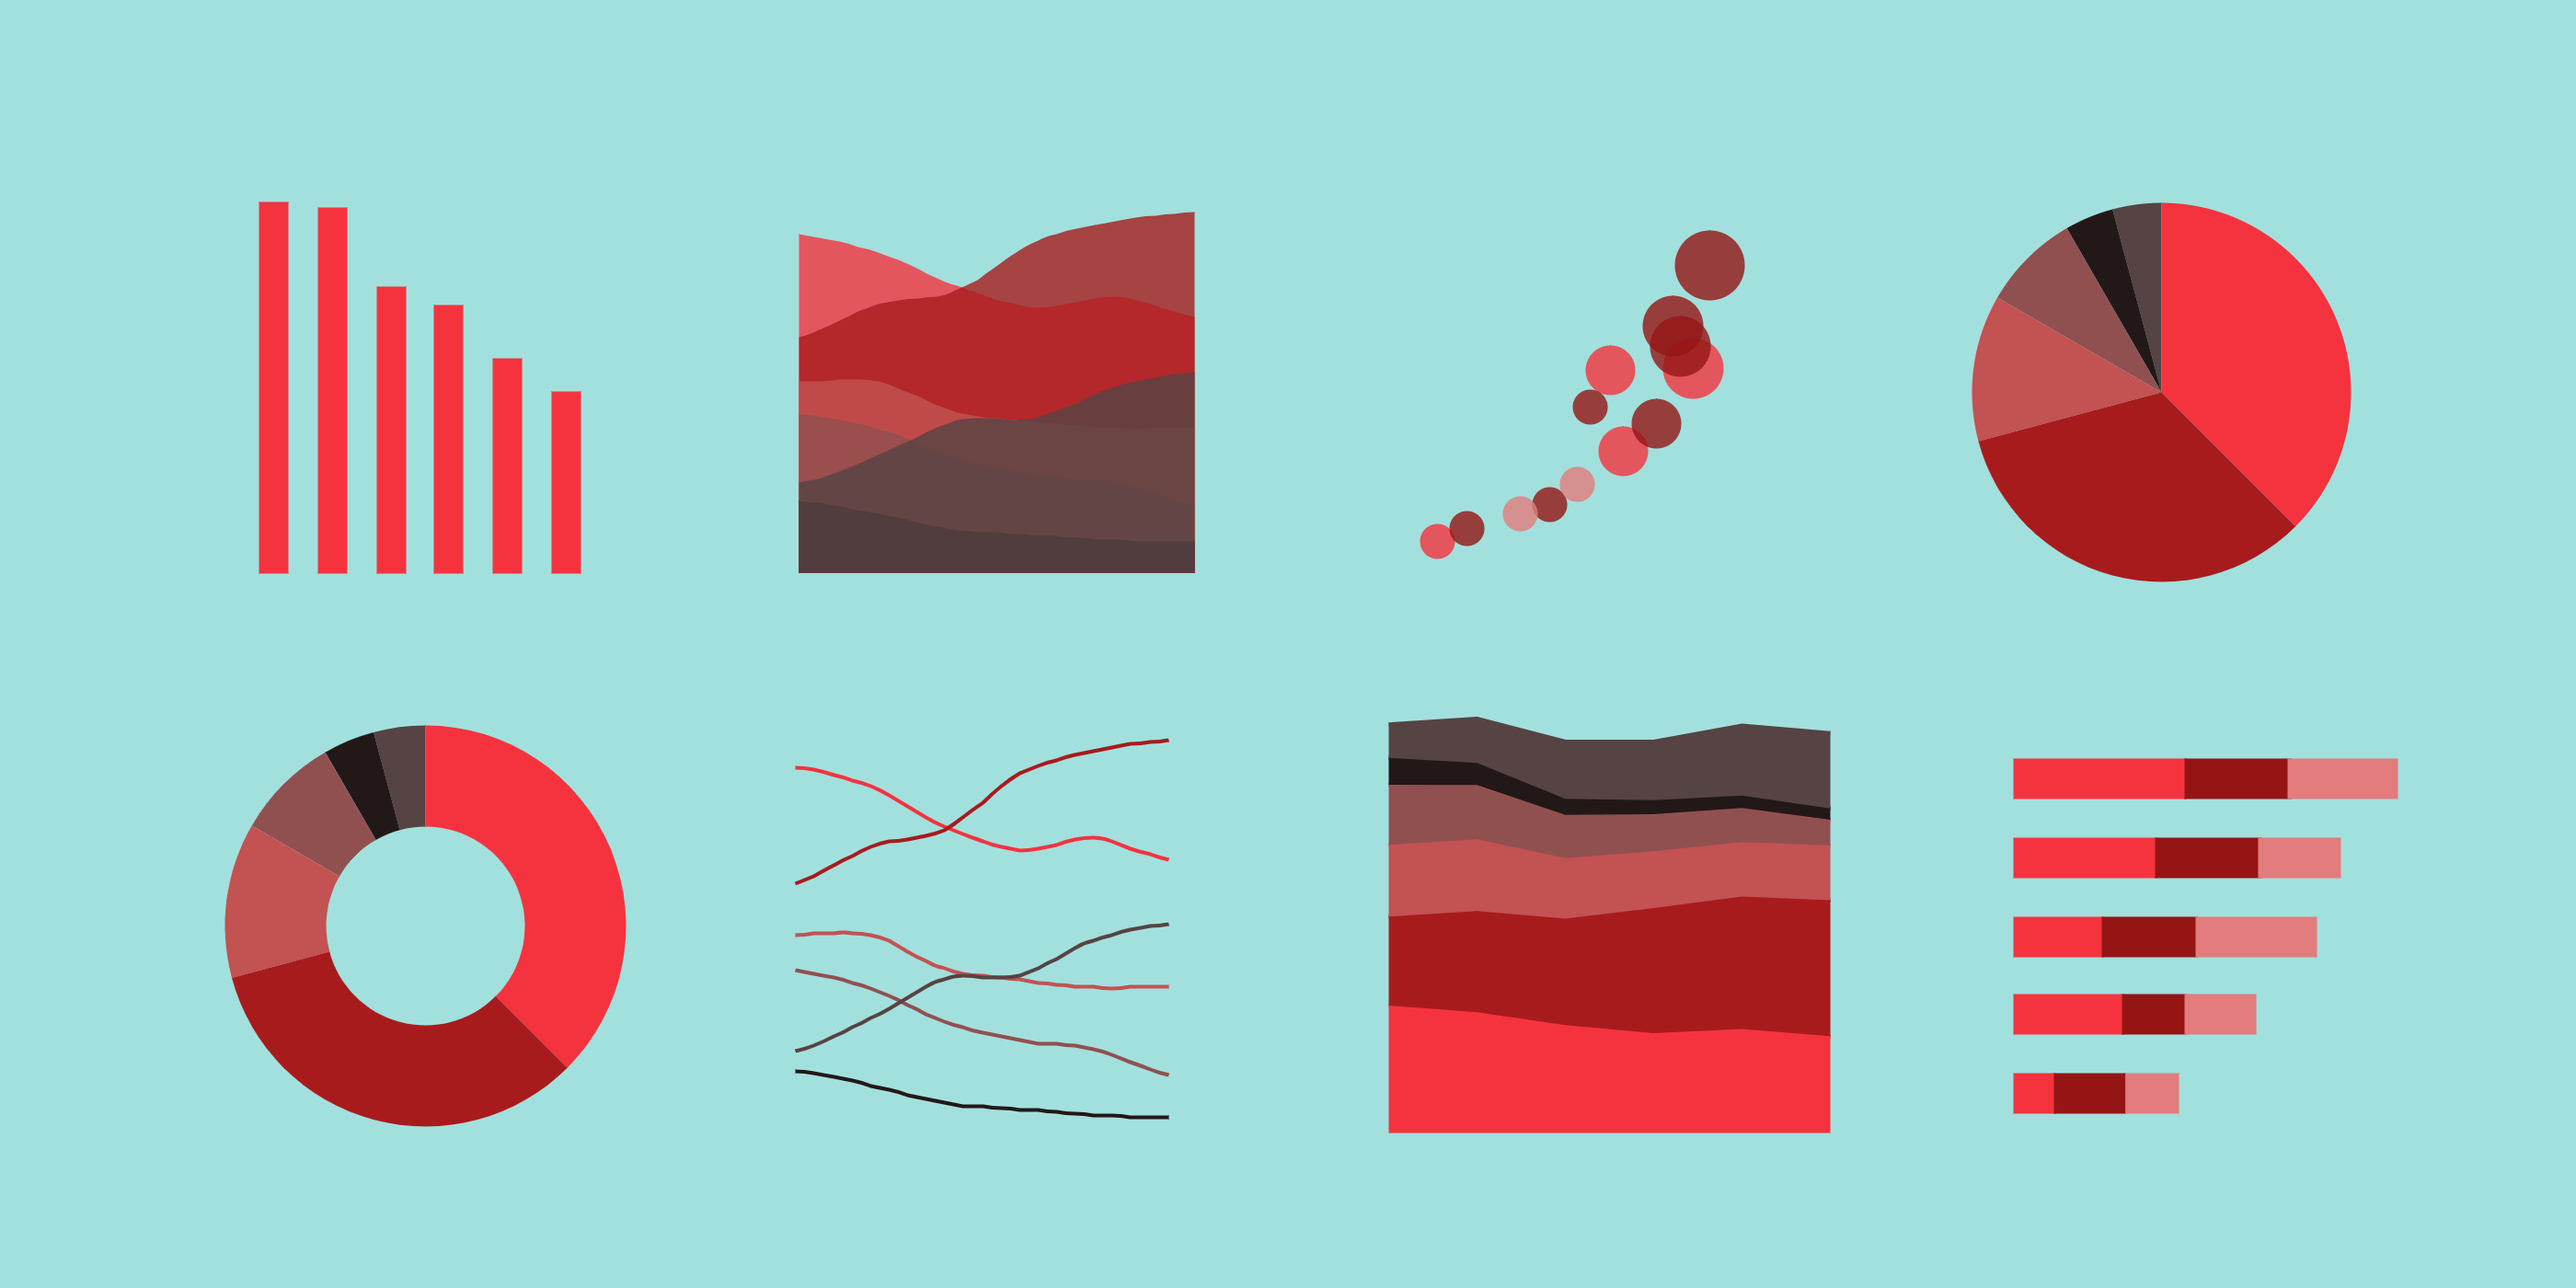

###4. **Genre Analysis**:
   - Create a word cloud or bar plot for genre distribution (you can use bidi library for persian text)
   - Obtain the 10 most frequently occurring words for each genre, based on both the initial summaries and the preprocessed summaries.
   - Analyze the distribution of movies across genres
   - Explore the relationship between genres and other variables

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bidi import algorithm as bidi_algorithm

class GenreAnalysis:
    def __init__(self, df):
        self.df = df

    def visualize_genre_distribution(self, column):
        """
        Create a word cloud or bar plot for genre distribution.

        Args:
            column (str): The column name containing the genre information.

        Returns:
            None (displays the plot)

        TODO:
        1. Check if the data is in Persian or English.
        2. If the data is in Persian, use the bidi library to handle right-to-left text direction.
        3. Create a word cloud or bar plot for the genre distribution using Matplotlib or Seaborn.
        4. Set appropriate titles and labels for the plot.
        5. Display the plot.
        """
        pass

    def frequent_words_by_genre(self, content_column, genre_column):
        """
        Obtain the 10 most frequently occurring words for each genre, based on both the initial summaries and the preprocessed summaries.

        Args:
            content_column (str): The column name containing the text data.
            genre_column (str): The column name containing the genre information.

        Returns:
            None (prints the top 10 most frequent words for each genre)

        TODO:
        1. Group the data by genre.
        2. For each genre:
            a. Get the top 10 most frequent words from the initial summaries.
            b. Get the top 10 most frequent words from the preprocessed summaries (if available).
            c. Print the top 10 frequent words for both cases.
        """
        pass

    def analyze_genre_distribution(self, genre_column):
        """
        Analyze the distribution of movies across genres.

        Args:
            genre_column (str): The column name containing the genre information.

        Returns:
            None (prints the analysis of genre distribution)

        TODO:
        1. Calculate the count of movies for each genre.
        2. Determine the most and least popular genres based on the movie count.
        3. Print the analysis of genre distribution, including the most and least popular genres.
        """
        pass

    def explore_genre_relationships(self, genre_column, other_columns):
        """
        Explore the relationship between genres and other variables.

        Args:
            genre_column (str): The column name containing the genre information.
            other_columns (list): A list of column names to explore relationships with.

        Returns:
            None (displays plots or prints analysis)

        TODO:
        1. Iterate through each column in other_columns.
        2. Generate appropriate plots or calculations to explore the relationship between genres and the selected column.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots or print the analysis.
        """
        pass


genre_analysis = GenreAnalysis(df)

# TODO: Call the visualize_genre_distribution method with the genre_column
# genre_analysis.visualize_genre_distribution(genre_column)

# TODO: Call the frequent_words_by_genre method with the content_column and genre_column
# genre_analysis.frequent_words_by_genre(content_column, genre_column)

# TODO: Call the analyze_genre_distribution method with the genre_column
# genre_analysis.analyze_genre_distribution(genre_column)

# TODO: Call the explore_genre_relationships method with the genre_column and other_columns
# genre_analysis.explore_genre_relationships(genre_column, other_columns)

In one paragraph, briefly explain what you found interesting in your analysis and whether this analysis prompted you to take any further steps; if so, explain those additional steps.



###5. **Time-based Analysis**:
   - Plot line or bar charts for movie releases over time
   - Investigate trends or patterns in movie releases
   - Analyze the relationship between release year and other variables

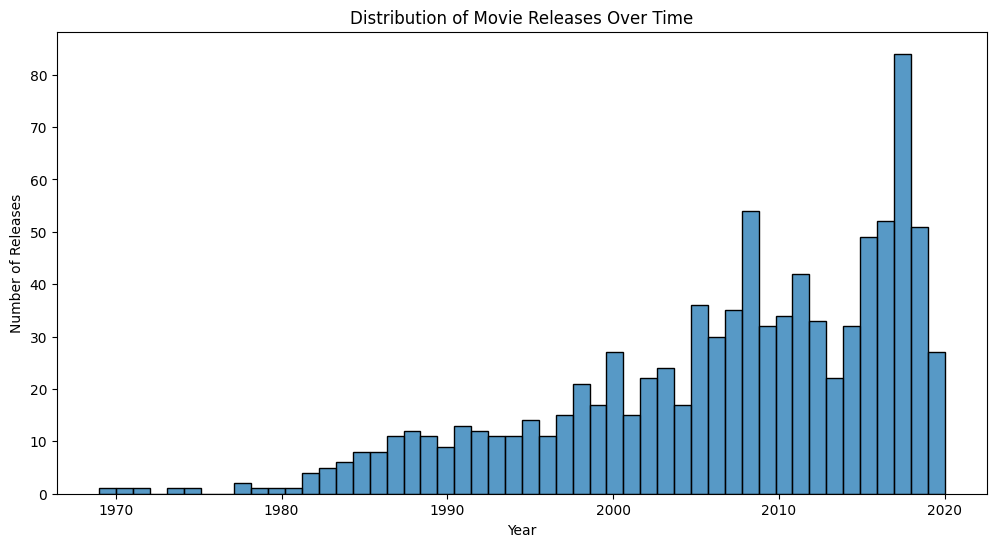

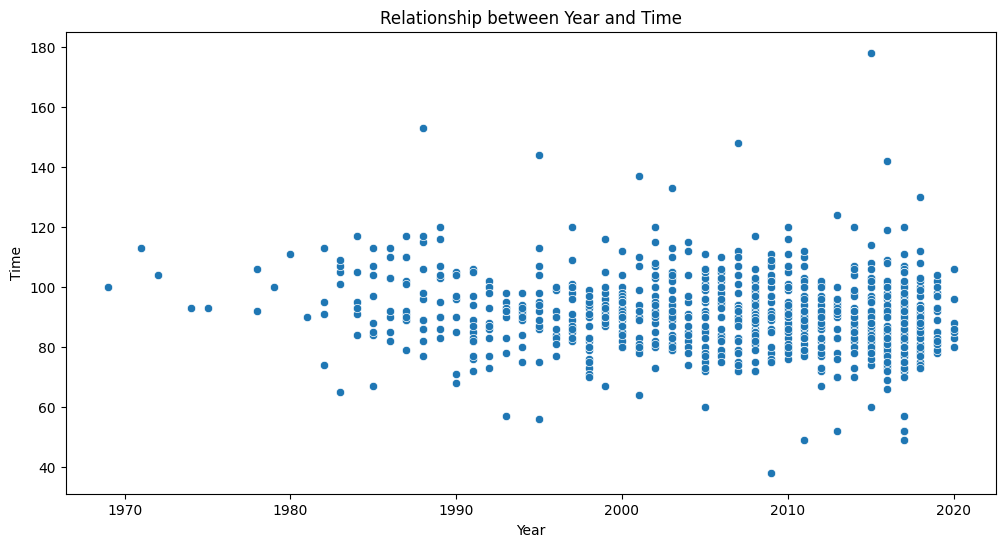

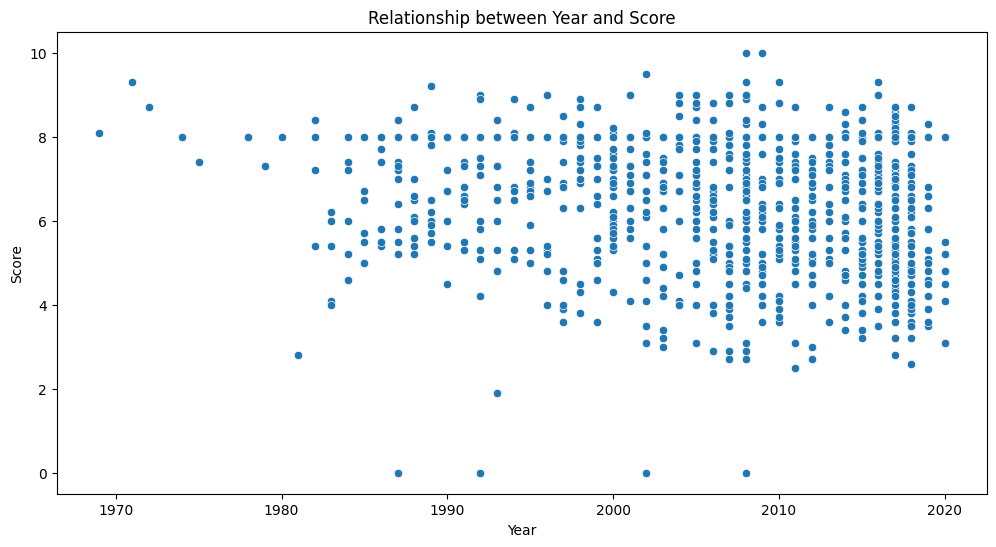

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

class TimeAnalysis:
    def __init__(self, df):
        self.df = df

    def plot_movie_releases(self, time_column):
        """
        Plot line or bar charts for movie releases over time.

        Args:
            time_column (str): The column name containing the time or release year information.

        Returns:
            None (displays the plot)

        TODO:
        1. Check if the time_column contains continuous time data (e.g., years) or discrete time data (e.g., decades).
        2. Create a line or bar chart to show the distribution of movie releases over time using Matplotlib or Seaborn.
        3. Set appropriate titles and labels for the plot.
        4. Display the plot.
        """
        plt.figure(figsize=(12, 6))
        sns.histplot(self.df[time_column].dropna(), bins=50, kde=False)
        plt.title('Distribution of Movie Releases Over Time')
        plt.xlabel('Year')
        plt.ylabel('Number of Releases')
        plt.show()

    def explore_time_relationships(self, time_column, other_columns):
        """
        Analyze the relationship between release time and other variables.

        Args:
            time_column (str): The column name containing the time or release year information.
            other_columns (list): A list of column names to explore relationships with.

        Returns:
            None (displays plots or prints analysis)

        TODO:
        1. Iterate through each column in other_columns.
        2. Generate appropriate plots or calculations to explore the relationship between release time and the selected column.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots or print the analysis.
        """
        for col in other_columns:
            plt.figure(figsize=(12, 6))
            if self.df[col].dtype in ['int64', 'float64']:
                sns.scatterplot(x=self.df[time_column], y=self.df[col])
                plt.title(f'Relationship between {time_column} and {col}')
                plt.xlabel(time_column)
                plt.ylabel(col)
            elif self.df[col].dtype == 'O':  # Check if the column is object type (string)
                sns.boxplot(x=self.df[time_column], y=self.df[col])
                plt.title(f'Relationship between {time_column} and {col}')
                plt.xlabel(time_column)
                plt.ylabel(col)
            plt.show()


# Assuming you have a pandas DataFrame named 'df'
time_analysis = TimeAnalysis(df)

# TODO: Call the plot_movie_releases method with the time_column
time_column = "Year"
time_analysis.plot_movie_releases(time_column)

other_columns = ["Time", "Score"]
# TODO: Call the explore_time_relationships method with the time_column and other_columns
time_analysis.explore_time_relationships(time_column, other_columns)

In one paragraph, briefly explain what you found interesting in your analysis.

It seems that movies produced each year rise over time, but their average quality (score) also drops.


###6. **Rating Analysis**:
   - Visualize the distribution of ratings
   - Obtain the 10 most frequently occurring words for each Rating, based on both the initial summaries and the preprocessed summaries.
   - Explore the relationship between ratings and other variables


In [12]:
import matplotlib.pyplot as plt
from collections import Counter

class RatingAnalysis:
    def __init__(self, df):
        self.df = df

    def visualize_rating_distribution(self, rating_column):
        """
        Visualize the distribution of ratings.

        Args:
            rating_column (str): The column name containing the rating information.

        Returns:
            None (displays the plot)

        TODO:
        1. Create a histogram or density plot to visualize the distribution of ratings using Matplotlib or Seaborn.
        2. Set appropriate titles and labels for the plot.
        3. Display the plot.
        """
        pass

    def frequent_words_by_rating(self, content_column, rating_column, n=10):
        """
        Obtain the 10 most frequently occurring words for each rating, based on both the initial summaries and the preprocessed summaries.

        Args:
            content_column (str): The column name containing the text data.
            rating_column (str): The column name containing the rating information.
            n (int): The number of most frequent words to obtain (default is 10).

        Returns:
            None (prints the top n frequent words for each rating)

        TODO:
        1. Group the data by rating.
        2. For each rating:
            a. Get the top n most frequent words from the initial summaries.
            b. Get the top n most frequent words from the preprocessed summaries (if available).
            c. Print the top n frequent words for both cases.
        """
        pass

    def explore_rating_relationships(self, rating_column, other_columns):
        """
        Explore the relationship between ratings and other variables.

        Args:
            rating_column (str): The column name containing the rating information.
            other_columns (list): A list of column names to explore relationships with.

        Returns:
            None (displays plots or prints analysis)

        TODO:
        1. Iterate through each column in other_columns.
        2. Generate appropriate plots or calculations to explore the relationship between ratings and the selected column.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots or print the analysis.
        """
        pass



rating_analysis = RatingAnalysis(df)

# TODO: Call the visualize_rating_distribution method with the rating_column
# rating_analysis.visualize_rating_distribution(rating_column)

# TODO: Call the frequent_words_by_rating method with the content_column and rating_column
# rating_analysis.frequent_words_by_rating(content_column, rating_column)

# TODO: Call the explore_rating_relationships method with the rating_column and other_columns
# rating_analysis.explore_rating_relationships(rating_column, other_columns)

In one paragraph, briefly explain what you found interesting in your analysis.


###7. **Correlation and Multivariate Analysis**:
   - Calculate correlation coefficients between numerical variables
   - Use scatter plot matrices or pair plots for multivariate visualization
   - Employ dimensionality reduction techniques (e.g., PCA) for better visualization

In [13]:
# Feel free to add any desired methods to the class below this is a suggestion.

class MultivariateAnalysis:
    def __init__(self, df):
        self.df = df

    def calculate_correlations(self, numerical_cols):
        """
        Calculate correlation coefficients between numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (prints the correlation matrix)

        TODO:
        1. Select the numerical columns from the DataFrame.
        2. Calculate the correlation matrix between the numerical columns.
        3. Print the correlation matrix.
        """
        pass

    def visualize_multivariate(self, numerical_cols):
        """
        Use scatter plot matrices or pair plots for multivariate visualization.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the multivariate plot)

        TODO:
        1. Select the numerical columns from the DataFrame.
        2. Create a scatter plot matrix or pair plot using Matplotlib or Seaborn for multivariate visualization.
        3. Set appropriate titles and labels for the plot.
        4. Display the plot.
        """
        pass

    def dimensionality_reduction(self, numerical_cols, target_column=None):
        """
        Employ dimensionality reduction techniques (e.g., PCA) for better visualization.

        Args:
            numerical_cols (list): A list of column names containing numerical data.
            target_column (str, optional): The column name containing the target variable (if applicable).

        Returns:
            None (displays the dimensionality-reduced plot)

        TODO:
        1. Select the numerical columns from the DataFrame.
        2. Perform standardization on the numerical data.
        3. Apply Principal Component Analysis (PCA) or another dimensionality reduction technique.
        4. If a target_column is provided, color the data points based on the target variable.
        5. Create a scatter plot for the first two principal components.
        6. Set appropriate titles and labels for the plot.
        7. Display the plot.
        """
        pass

# Example usage
numerical_cols = []
target_column = 'Rating' # This is a suggestion feel free to try other targets as well.

# Assuming you have a pandas DataFrame named 'df'
multivariate_analysis = MultivariateAnalysis(df)

# TODO: Call the calculate_correlations method with the numerical_cols list
# multivariate_analysis.calculate_correlations(numerical_cols)

# TODO: Call the visualize_multivariate method with the numerical_cols list
# multivariate_analysis.visualize_multivariate(numerical_cols)

# TODO: Call the dimensionality_reduction method with the numerical_cols list and target_column
# multivariate_analysis.dimensionality_reduction(numerical_cols, target_column)

In one paragraph, briefly explain what you found interesting in your analysis.


###8. **Outlier Detection**:
   - Identify and investigate potential outliers
   - Determine if outliers are genuine or result from data issues

In [14]:
# Feel free to add any desired methods to the class below this is a suggestion you can change it anyway you like!


class OutlierDetection:
    def __init__(self, df):
        self.df = df

    def identify_outliers(self, numerical_cols):
        """
        Identify and visualize potential outliers for numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the plots for identifying outliers)

        TODO:
        1. Iterate through each numerical column.
        2. Create a boxplot for each column using Matplotlib or Seaborn.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots.
        """
        pass

    def investigate_outliers(self, numerical_cols):
        """
        Investigate potential outliers and determine if they are genuine or result from data issues.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (prints the analysis of potential outliers)

        TODO:
        1. Iterate through each numerical column.
        2. Identify potential outliers using appropriate techniques (e.g., IQR, z-score).
        3. Investigate the potential outliers by examining their values and associated data.
        4. Determine if the potential outliers are genuine or result from data issues.
        5. Print the analysis of potential outliers, including any insights or recommendations.
        """
        pass



# Assuming you have a pandas DataFrame named 'df'
outlier_detection = OutlierDetection(df)

# TODO: Call the identify_outliers method with the numerical_cols list
# outlier_detection.identify_outliers(numerical_cols)

# TODO: Call the investigate_outliers method with the numerical_cols list
# outlier_detection.investigate_outliers(numerical_cols)


###9. **Data Balancing and Feature Engineering**:

*   Genre Mapping and Balancing

*   Resampling Considerations
*   Encoding Categorical Variables




It is possible to map different genres that are similar to a set of base genres. This approach can help avoid an excessive number of unbalanced categories. Here, we provide a mapping of genres that you can utilize if you find it useful. To further maintain a balanced dataset, you can explore resampling techniques.



This is the mapping I came up with, you can change it if you like.

In [15]:
genre_dict = {
    'Romance': 'Drama',
    'Animation': 'Comedy',
    'Crime': 'Action',
    'War': 'Action',
    'Adventure': 'Action',
    'Mystery': 'Action',
    'Horror': 'Action',
    'Thriller': 'Action',
    'Human Interest & Society': 'Culture',
    'Arts & Literature': 'Culture',
    'Family': 'Culture',
    'History': 'Culture',
    'Architecture': 'Culture',
    'Experimental': 'Culture',
    'Music': 'Culture',
    'Portrait': 'Culture'
}

df['New_Genre'] = df['Genre'].map(genre_dict).fillna(df['Genre'])


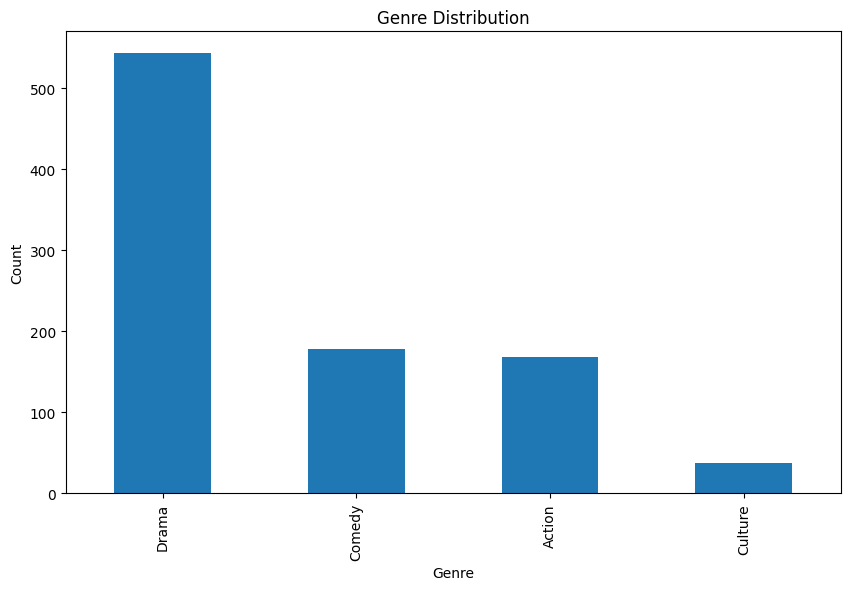

In [16]:
genre_counts = df['New_Genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


However, it is crucial to exercise caution when applying resampling methods. While these techniques can help balance the dataset, oversampling should not be excessive, as it may lead to model overfitting due to the model being exposed to repeated instances of the data. If you choose to train your model on an oversampled version of the dataset, ensure that your test dataset remains unaffected by the resampling process. It is recommended to split the data into an 80/20 ratio (train/test) before proceeding with resampling. (seed=42)



In [17]:
# Based on above description, you can modify the given class.

class DataResampling:
    def __init__(self, df, target_col):
        self.df = df
        self.target_col = target_col

    def split_data(self, test_size=0.2, random_state=42):
        """
        Split the dataset into training and testing sets.

        Args:
            test_size (float): The proportion of the dataset to include in the test split (default: 0.2).
            random_state (int): The random seed for reproducibility (default: 42).

        Returns:
            tuple: (X_train, X_test, y_train, y_test)
                X_train (pandas.DataFrame): Training features.
                X_test (pandas.DataFrame): Testing features.
                y_train (pandas.Series): Training target.
                y_test (pandas.Series): Testing target.

        TODO:
        1. Separate the target variable from the features.
        2. Split the dataset into training and testing sets using the provided test_size and random_state.
        3. Return the training and testing features and targets.
        """
        pass

    def resample_data(self, X_train, y_train, random_state=42):
        """
        Apply resampling techniques to balance the training dataset.

        Args:
            X_train (pandas.DataFrame): Training features.
            y_train (pandas.Series): Training target.
            random_state (int): The random seed for reproducibility (default: 42).

        Returns:
            tuple: (X_resampled, y_resampled)
                X_resampled (pandas.DataFrame): Resampled training features.
                y_resampled (pandas.Series): Resampled training target.

        TODO:
        1. Identify the class imbalance in the training data.
        2. Apply appropriate resampling techniques (e.g., RandomOverSampler, SMOTE) to balance the classes.
        3. Return the resampled training features and target.
        """
        pass


data_resampling = DataResampling(df, target_col)

# TODO: Call the split_data method to split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = data_resampling.split_data()

# TODO: Call the resample_data method to resample the training data
# X_resampled, y_resampled = data_resampling.resample_data(X_train, y_train)

NameError: name 'target_col' is not defined

Additionally, encoding categorical variables is an essential step in feature engineering for machine learning models. Depending on the nature of your categorical features, you may need to apply techniques such as one-hot encoding or label encoding to convert them into a format suitable for model training.

In [ ]:
# Feel free to change or modify this function, this is a suggestion.

class CategoricalEncoder:
    def __init__(self, df, categorical_cols):
        self.df = df
        self.categorical_cols = categorical_cols

    def label_encode(self, drop_first=False):
        """
        Apply label encoding to categorical variables.

        Args:
            drop_first (bool): If True, drop the first column of one-hot encoded data to avoid multicollinearity.

        Returns:
            pandas.DataFrame: The DataFrame with categorical variables encoded.

        TODO:
        1. Instantiate a LabelEncoder object.
        2. Iterate through each categorical column.
        3. Fit and transform the categorical column using the LabelEncoder.
        4. Replace the original categorical column with the encoded values.
        5. Return the encoded DataFrame.
        """
        pass

    def one_hot_encode(self, drop_first=False):
        """
        Apply one-hot encoding to categorical variables.

        Args:
            drop_first (bool): If True, drop the first column of one-hot encoded data to avoid multicollinearity.

        Returns:
            pandas.DataFrame: The DataFrame with categorical variables one-hot encoded.

        TODO:
        1. Instantiate a OneHotEncoder object with the appropriate settings (drop_first=drop_first, handle_unknown='ignore').
        2. Iterate through each categorical column.
        3. Fit and transform the categorical column using the OneHotEncoder.
        4. Concatenate the one-hot encoded columns with the original DataFrame.
        5. Drop the original categorical columns.
        6. Return the one-hot encoded DataFrame.
        """
        pass


categorical_encoder = CategoricalEncoder(df, categorical_cols)

# TODO: Call the label_encode method to apply label encoding
# df_label_encoded = categorical_encoder.label_encode()

# TODO: Call the one_hot_encode method to apply one-hot encoding
# df_one_hot_encoded = categorical_encoder.one_hot_encode(drop_first=True)

# Fine-tuning

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        pass

    def __getitem__(self, idx):
        pass

    def __len__(self):
        pass

## Persian

In [ ]:
# load pre-trained ParsBERT model and its tokenizer
tokenizer = None
model = None

### Preprocessed

In [ ]:
# Choose train and test data from preprocessed persian data
# tokenize train and test data with max_length 512
train_encodings = None
test_encodings = None
train_dataset = CustomDataset(train_encodings, y_train)
test_dataset = CustomDataset(test_encodings, y_test)


In [ ]:
# Train the model using huggingface trainer
num_epochs = 5


In [ ]:
# Calulate the Accuracy and F1-score for test data
# Draw Confusion matrix according to all genres


### Not Preprocessed


In [ ]:
# Repeat all the previous steps for the raw persian data
# Don't forget to load the model again


## English


In [ ]:
# load  pre-trained BERT model and its tokenizer
tokenizer = None
model = None

### Preprocessed

In [ ]:
# Repeat all the needed steps for the preprocessed english data



### Not Preprocessed


In [ ]:
# Repeat all the previous steps for the raw english data
# Don't forget to load the model again


## Results Analysis

Analyze the results of the Fine-tuning section.
